In [ ]:
! python -m pip install -U scikit-image
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 9.7 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
Mounted at /content/drive


In [ ]:
import sys
# user = "pam"
user = 'saurabh'
# user = 'aditya'

# define path to code 
if user == "pam":
  sys.path.append('/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w')
  print("using param's path")
elif user == 'saurabh':
  sys.path.append('/content/drive/MyDrive/809k/Project/Codes/3d-super-res-cnn-master/h and w')
  print("using saurabh's path")
else:
  sys.path.append('/content/drive/MyDrive/ENPM809K/Project/Codes/3d-super-res-cnn-master/h and w')

using saurabh's path


In [ ]:
import torch
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn 
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary

import os
import numpy as np
import cv2 as cv
import random
import math
from sklearn.utils import shuffle
import pdb
import re
import glob

import data_reader as reader
import utils
import params

SHOW_IMAGES = False 
 
params.show_params()   

if user == 'pam': 
  data_reader = reader.DataReader('/content/drive/MyDrive/Project/Datasets/3_Subjects', './data/validation', './data/test')
elif user == 'saurabh': 
  data_reader = reader.DataReader('/content/drive/MyDrive/809k/Project/Datasets/3_Subjects', './data/validation', './data/test')
else:
  data_reader = reader.DataReader('/content/drive/MyDrive/ENPM809K/Project/Datasets/3_Subjects', './data/validation', './data/test')



Instructions for updating:
non-resource variables are not supported in the long term







The configuration file is:
scale = 2 
folder base name = ../cnn-3d/3d-images 
folder name = 00001_0004 
image extension = png 
interpolation method = 4 
num epochs = 40 
loss = 1 
learning rate = 0.0001 
dim patch = 64 
dim depth = 16 
kernel size = 5 
folder data size = ./data_ckpt/ 
num_channels  = 1 



There are 2048 images in /content/drive/MyDrive/809k/Project/Datasets/3_Subjects/IXI029-Guys-0829-T1/input_train_64_2/*png
The size of the first image is (32, 32)
There are 2048 images in /content/drive/MyDrive/809k/Project/Datasets/3_Subjects/IXI029-Guys-0829-T1/gt_train_64_2/*png
The size of the first image is (64, 64)
number of train images is 2048


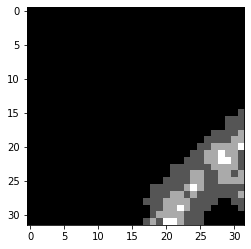

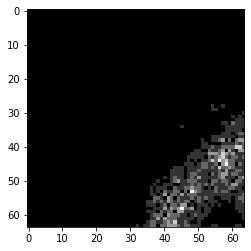

In [ ]:
#Target and input image are same now
import os
image , target = data_reader.get_next_batch_train(4050,1)
import matplotlib.pyplot as plt
plt.imshow(image[0,:,:,0],cmap='gray')
plt.show()
plt.imshow(target[0,:,:,0],cmap='gray')
plt.show()


In [ ]:
from custom_network_h_w import Net
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net()
model = model.to(device)
print(model)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU1): ELU(alpha=1.0)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU2): ELU(alpha=1.0)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU3): ELU(alpha=1.0)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU4): ELU(alpha=1.0)
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU5): ELU(alpha=1.0)
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU6): ELU(alpha=1.0)
  (conv7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU7): ELU(alpha=1.0)
  (conv8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU8): ELU(alpha=1.0)
  (conv9): Conv2d(32, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU9): ELU(alpha=1.0)
  (depth2space): PixelShuffle(upscale_factor=2)
  (conv10): Conv2d(1, 32, kernel_size=(3, 3), str

In [ ]:
if user == 'pam': 
  model_path = '/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/Checkpoint_38.pth'
elif user == 'saurabh': 
  model_path = '/content/drive/MyDrive/809k/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/Checkpoint_38.pth'
else:
  model_path = '/content/drive/MyDrive/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/Checkpoint_38.pth'
model = torch.load(model_path)
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU1): ELU(alpha=1.0)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU2): ELU(alpha=1.0)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU3): ELU(alpha=1.0)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU4): ELU(alpha=1.0)
  (conv5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU5): ELU(alpha=1.0)
  (conv6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU6): ELU(alpha=1.0)
  (conv7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU7): ELU(alpha=1.0)
  (conv8): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU8): ELU(alpha=1.0)
  (conv9): Conv2d(32, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (ELU9): ELU(alpha=1.0)
  (depth2space): PixelShuffle(upscale_factor=2)
  (conv10): Conv2d(1, 32, kernel_size=(3, 3), str

In [ ]:
#testing
params.folder_data = "/content/drive/MyDrive/ENPM809K/Project/Codes/3d-super-res-cnn-master/h and w/custom_data_ckpt/"
batch_size = 128

#loss
if params.LOSS == params.L1_LOSS:
	loss = nn.L1Loss()
if params.LOSS == params.L2_LOSS:
  loss = nn.L1Loss()

print('the number of images is: ', data_reader.num_train_images)
predicted_images = np.zeros((len(data_reader.train_images_in),64,64,1))
batch_loss = 0
num_images = 0
num_iterations = math.floor(data_reader.num_train_images / batch_size)
print('the number of iterations is %d' % num_iterations)
ssim_epoch = 0
psnr_epoch = 0

with torch.no_grad():
  for i in range(0, num_iterations): 
    torch.cuda.empty_cache()
    input_, target_  = data_reader.get_next_batch_train(i, batch_size)
    num_images += batch_size
    input_ = np.reshape(input_ , (batch_size, 1,32,32))
    input_ = torch.from_numpy(input_)
    
    input_ = input_.to(device,dtype = torch.float)

    target_ = np.reshape(target_ , (batch_size ,1,64,64))
    target_ = torch.from_numpy(target_)
    target_ = target_.to(device,dtype = torch.float)

    output = model(input_)
    loss_ = loss(output , target_  )
    
    # ssim_batch, psnr_batch = utils.compute_ssim_psnr_batch(np.round(output.detach().cpu().numpy()), np.round(target_.detach().cpu().numpy()))
    output = output.cpu().data.numpy()
    target_ = target_.cpu().data.numpy()
    predicted_images[i*batch_size:(i+1)*batch_size, :, :, :] = output.reshape(batch_size,64,64,1)


    ssim_batch, psnr_batch = utils.compute_ssim_psnr_batch(np.round(output.reshape(batch_size,64,64,1)), np.round(target_.reshape(batch_size,64,64,1)))
    
    batch_loss += loss_ * batch_size
    ssim_epoch += ssim_batch
    psnr_epoch += psnr_batch
    print("Iteration{} ...".format(i), "Testing loss: {:.4f}  ssim: {:.4f} psnr: {:.4f}".
        format(batch_loss/num_images, ssim_epoch/num_images, psnr_epoch/num_images))

      # print("Epoch/Iteration {}/{} ...".format(epoch, i), "Training loss: {:.4f}  ".format(batch_loss/num_images) , "Learning rate:  {:.8f}".format(lr))


the number of images is:  2048
the number of iterations is 16
Iteration0 ... Testing loss: 1.0693  ssim: 0.9786 psnr: 50.0126
Iteration1 ... Testing loss: 1.1133  ssim: 0.9777 psnr: 49.3326
Iteration2 ... Testing loss: 1.5087  ssim: 0.9736 psnr: 47.0546
Iteration3 ... Testing loss: 1.9054  ssim: 0.9703 psnr: 44.6479
Iteration4 ... Testing loss: 2.3007  ssim: 0.9670 psnr: 42.7680
Iteration5 ... Testing loss: 2.6406  ssim: 0.9640 psnr: 41.2237
Iteration6 ... Testing loss: 2.9196  ssim: 0.9609 psnr: 39.9462
Iteration7 ... Testing loss: 3.1271  ssim: 0.9584 psnr: 38.9454
Iteration8 ... Testing loss: 3.3502  ssim: 0.9559 psnr: 38.0943
Iteration9 ... Testing loss: 3.4967  ssim: 0.9543 psnr: 37.4955
Iteration10 ... Testing loss: 3.6608  ssim: 0.9526 psnr: 36.8710
Iteration11 ... Testing loss: 3.7380  ssim: 0.9518 psnr: 36.4437
Iteration12 ... Testing loss: 3.7829  ssim: 0.9516 psnr: 36.1696
Iteration13 ... Testing loss: 3.8198  ssim: 0.9516 psnr: 35.9705
Iteration14 ... Testing loss: 3.8189  